# [Facebook Prophet](https://github.com/facebook/prophet) and [NeuralProphet](https://github.com/ourownstory/neural_prophet) Comparison
By: Rayhan Ozzy Ertarto

The goal of this notebook is to compare the *expected values* forecasted by these two models and compare them against the actuals in order to calculate the performance metrics and define which model performs better using this time series dataset (Rainfall in Tanjung Priok BMKG Station, North Jakarta)

Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1234)

In [3]:
plt.style.use('ggplot')

Reading the time series

In [4]:
gsheetkey = "1qAe0nBzswVA1vekBH97Sj2uBQQWdN8RQ3g95pjc7CT4"

url=f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=csv'
df_tp = pd.read_csv(url)
df_tp.head(10)

,Tanggal,RR
0,01-01-2021,7.7
1,02-01-2021,0.5
2,03-01-2021,NaN
3,04-01-2021,2.8
4,05-01-2021,NaN
5,06-01-2021,19.1
6,07-01-2021,32.0
7,08-01-2021,2.8
8,09-01-2021,3.9
9,10-01-2021,31.5


In [5]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  424 non-null    object 
 1   RR       382 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [6]:
df_tp['RR'] = df_tp['RR'].replace([8888.0],['NaN'])

In [7]:
df_tp['RR'] = df_tp['RR'].replace([9999.0],['NaN'])

In [8]:
df_tp.head(10)

,Tanggal,RR
0,01-01-2021,7.7
1,02-01-2021,0.5
2,03-01-2021,NaN
3,04-01-2021,2.8
4,05-01-2021,NaN
5,06-01-2021,19.1
6,07-01-2021,32.0
7,08-01-2021,2.8
8,09-01-2021,3.9
9,10-01-2021,31.5


In [9]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  424 non-null    object
 1   RR       382 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [10]:
df_tp['RR'] = df_tp['RR'].astype(float)
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  424 non-null    object 
 1   RR       358 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [11]:
df_tp.head()

,Tanggal,RR
0,01-01-2021,7.7
1,02-01-2021,0.5
2,03-01-2021,NaN
3,04-01-2021,2.8
4,05-01-2021,NaN


Check for Missing Values

In [12]:
df_tp.isna().sum()

Tanggal     0
RR         66
dtype: int64

Fill Missing Values by Interpolation

In [13]:
df_tp = df_tp.interpolate()

In [14]:
df_tp.isna().sum()

Tanggal    0
RR         0
dtype: int64

In [15]:
df_tp.head(10)

,Tanggal,RR
0,01-01-2021,7.70
1,02-01-2021,0.50
2,03-01-2021,1.65
3,04-01-2021,2.80
4,05-01-2021,10.95
5,06-01-2021,19.10
6,07-01-2021,32.00
7,08-01-2021,2.80
8,09-01-2021,3.90
9,10-01-2021,31.50


In [16]:
df_tp_time = df_tp.set_index('Tanggal')
df_tp_time.head()

,RR
Tanggal,
01-01-2021,7.70
02-01-2021,0.50
03-01-2021,1.65
04-01-2021,2.80
05-01-2021,10.95


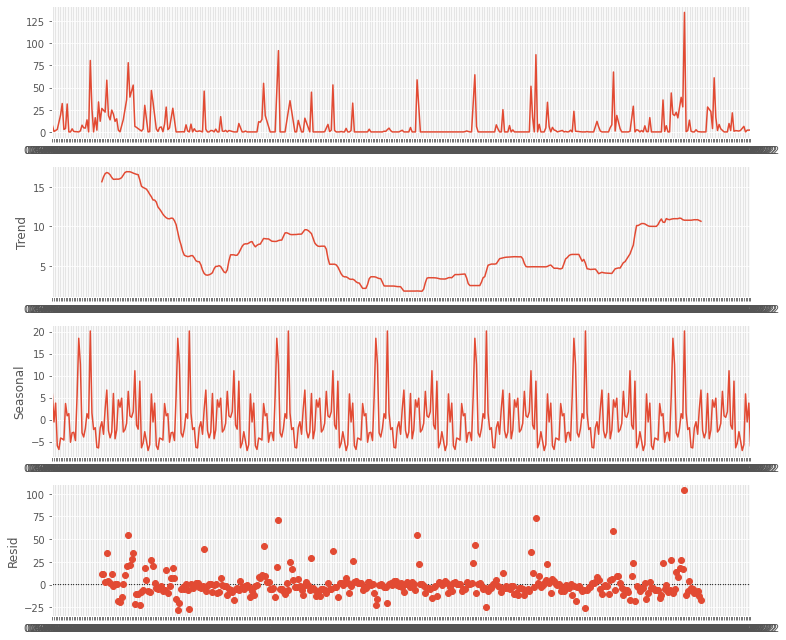

In [17]:
#Plot of decompotition
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_tp_time, 
                                         model = 'additive',
                                         period=60) 
fig = decomposition.plot()
plt.show()

In [18]:
df_tp['Tanggal'] = pd.to_datetime(df_tp['Tanggal'])
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  424 non-null    datetime64[ns]
 1   RR       424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


In [19]:
# Renaming columns
df_tp.rename(columns = {'Tanggal':'ds', 'RR':'y'}, inplace = True)
df_tp.head()

,ds,y
0,2021-01-01,7.70
1,2021-02-01,0.50
2,2021-03-01,1.65
3,2021-04-01,2.80
4,2021-05-01,10.95


In [20]:
df_tp.tail()

,ds,y
419,2022-02-24,6.30
420,2022-02-25,0.00
421,2022-02-26,2.00
422,2022-02-27,2.05
423,2022-02-28,2.10


In [21]:
#df_tp.set_index('ds').plot(figsize=(12,6))
#plt.title('Time Series Plot')

## Prophet Model

In [22]:
!pip install prophet -q

In [23]:
from prophet import Prophet

In [24]:
m = Prophet(seasonality_mode='additive')

Using default settings, only the seasonality mode is set to *Additive*



In [25]:
m.fit(df_tp)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.96492


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      43       701.089   0.000375066       59.3988   8.118e-06       0.001      107  LS failed, Hessian reset 
      72       701.124   2.10725e-05       58.5446    3.76e-07       0.001      187  LS failed, Hessian reset 
      99       701.135   1.53556e-05       49.7943      0.4365      0.4365      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       701.141   6.86081e-05       63.4313   1.483e-06       0.001      305  LS failed, Hessian reset 
     179       701.145   7.58142e-06       52.3852   1.219e-07       0.001      429  LS failed, Hessian reset 
     199       701.145   3.35579e-07       61.3635           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       701.145   2.25744e-08       55.3265      0.1832           1      475   
Optimization termin

In [26]:
future = m.make_future_dataframe(periods=60, freq='D')

In [27]:
future.tail(5)

,ds
479,2023-01-27
480,2023-01-28
481,2023-01-29
482,2023-01-30
483,2023-01-31


In [28]:
forecast = m.predict(future)

In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
479,2023-01-27,7.869571,-14.258537,24.512040,7.838997,7.898615,-1.894526,-1.894526,-1.894526,-1.894526,-1.894526,-1.894526,0.0,0.0,0.0,5.975045
480,2023-01-28,7.871490,-16.114213,25.888505,7.839685,7.901337,-2.671516,-2.671516,-2.671516,-2.671516,-2.671516,-2.671516,0.0,0.0,0.0,5.199974
481,2023-01-29,7.873408,-11.865674,28.692633,7.840498,7.904280,0.548258,0.548258,0.548258,0.548258,0.548258,0.548258,0.0,0.0,0.0,8.421665
482,2023-01-30,7.875326,-14.781810,28.268470,7.841741,7.907209,0.176712,0.176712,0.176712,0.176712,0.176712,0.176712,0.0,0.0,0.0,8.052038
483,2023-01-31,7.877244,-9.471701,29.652534,7.843010,7.910018,2.916798,2.916798,2.916798,2.916798,2.916798,2.916798,0.0,0.0,0.0,10.794042


Text(57.875, 0.5, 'Rainfall (mm)')

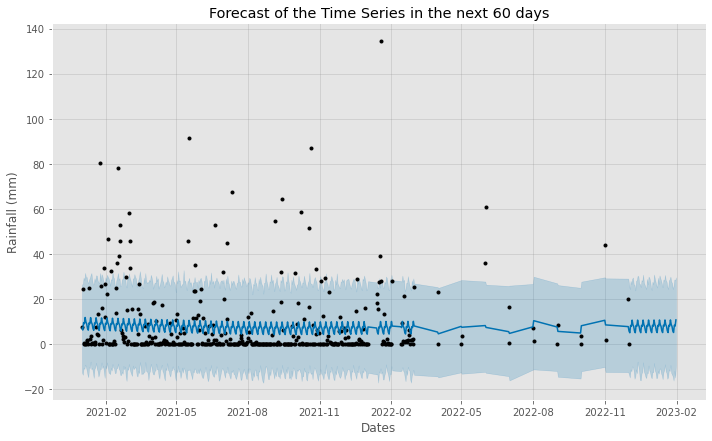

In [30]:
m.plot(forecast);
plt.title("Forecast of the Time Series in the next 60 days")
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

Components of the time series:


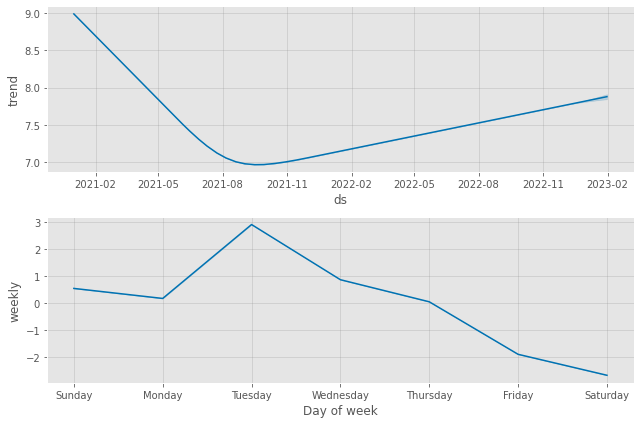

In [31]:
m.plot_components(forecast);
print("Components of the time series:")

In [32]:
#p_forecast = forecast[forecast['ds']>'2022-02-28'][['ds','yhat_lower','yhat','yhat_upper']]
p_forecast = forecast[['ds','yhat_lower','yhat','yhat_upper']]
p_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          484 non-null    datetime64[ns]
 1   yhat_lower  484 non-null    float64       
 2   yhat        484 non-null    float64       
 3   yhat_upper  484 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.2 KB


Text(0, 0.5, 'Rainfall (mm)')

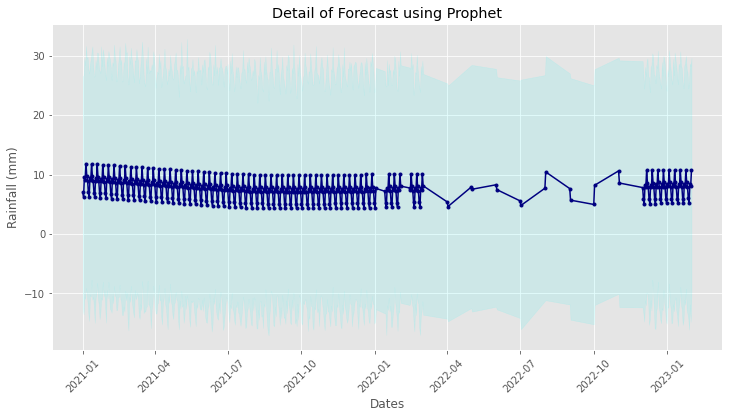

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using Prophet")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy')
plt.fill_between(p_forecast['ds'],p_forecast['yhat_lower'], p_forecast['yhat_upper'], alpha=0.1, color='cyan')
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

### Performance Metrics

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      424 non-null    datetime64[ns]
 1   y       424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


In [36]:
df_tp_merge = pd.merge(df_tp, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_tp_merge = df_tp_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_tp_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-01-01,-12.554910,26.524538,7.090341,7.70
1,2021-02-01,-10.827227,28.314620,8.866150,0.50
2,2021-03-01,-11.426195,28.630039,8.599310,1.65
3,2021-04-01,-12.278468,27.838064,8.180022,2.80
4,2021-05-01,-16.077887,23.100408,5.169860,10.95


In [37]:
df_tp_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
419,2022-02-24,-11.720964,26.206704,7.276019,6.30
420,2022-02-25,-15.662197,24.989971,5.330557,0.00
421,2022-02-26,-17.020070,23.919024,4.555486,2.00
422,2022-02-27,-13.862607,28.293251,7.777177,2.05
423,2022-02-28,-13.063388,26.824350,7.407550,2.10


In [38]:
prophet_mse = mean_squared_error(df_tp_merge['y'], df_tp_merge['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(df_tp_merge['y'], df_tp_merge['yhat']))

In [39]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 242.9972
Prophet RMSE: 15.5884


## NeuralProphet

In [40]:
!pip install neuralprophet -q

In [41]:
from neuralprophet import NeuralProphet, set_random_seed

In [42]:
set_random_seed(42)

In [43]:
nm = NeuralProphet(seasonality_mode='additive')

In [44]:
nm.fit(df_tp, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.17% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.17% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True t

  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.51E-02, min: 2.30E-01
INFO:NP.utils_torch:lr-range-test results: steep: 5.51E-02, min: 2.30E-01


  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.51E-02, min: 1.93E-01
INFO:NP.utils_torch:lr-range-test results: steep: 5.51E-02, min: 1.93E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.72E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 6.72E-02
Epoch[262/262]: 100%|██████████| 262/262 [00:13<00:00, 19.29it/s, SmoothL1Loss=0.064, MAE=8.99, RMSE=13.7, RegLoss=0] 


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.253268,22.102150,28.054430,0.0
1,0.239719,21.290670,27.367090,0.0
2,0.225372,20.439706,26.764395,0.0
3,0.209618,19.474955,25.692491,0.0
4,0.193053,18.436520,24.457262,0.0
...,...,...,...,...
257,0.063963,8.989144,13.531410,0.0
258,0.063958,8.990329,13.539375,0.0
259,0.063957,8.991812,13.419283,0.0
260,0.063955,8.991676,13.807043,0.0


In [45]:
n_future = nm.make_future_dataframe(df_tp, periods=60, n_historic_predictions=len(df_tp))
n_future

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 57.547% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 57.547% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


,ds,y
0,2021-01-01,7.7
1,2021-01-02,24.4
2,2021-01-03,0.3
3,2021-01-04,0.7
4,2021-01-05,0.0
...,...,...
479,2023-01-27,NaN
480,2023-01-28,NaN
481,2023-01-29,NaN
482,2023-01-30,NaN


In [46]:
n_future.tail()

,ds,y
479,2023-01-27,NaN
480,2023-01-28,NaN
481,2023-01-29,NaN
482,2023-01-30,NaN
483,2023-01-31,NaN


In [47]:
n_forecast = nm.predict(n_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.521% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.521% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.521% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.521% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


In [48]:
n_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             484 non-null    datetime64[ns]
 1   y              424 non-null    float64       
 2   yhat1          484 non-null    float64       
 3   residual1      424 non-null    float64       
 4   trend          484 non-null    float64       
 5   season_weekly  484 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 22.8 KB


In [49]:
n_forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly
479,2023-01-27,NaN,19.147282,NaN,20.805456,-1.658176
480,2023-01-28,NaN,19.292692,NaN,20.909813,-1.617119
481,2023-01-29,NaN,21.092865,NaN,21.014168,0.078698
482,2023-01-30,NaN,21.638859,NaN,21.118532,0.520327
483,2023-01-31,NaN,23.490078,NaN,21.222897,2.267182


Text(0, 0.5, 'Rainfall (mm)')

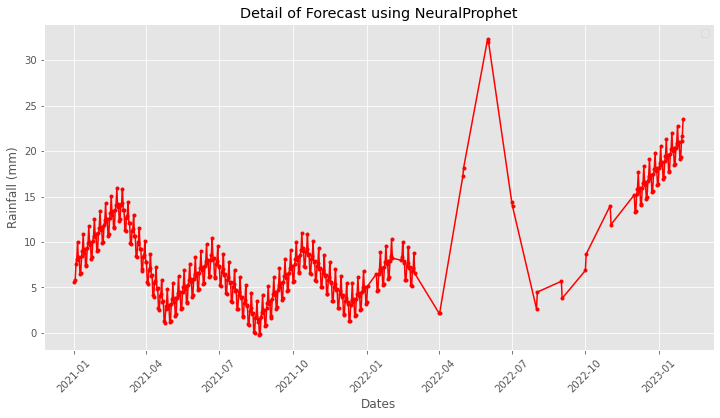

In [50]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using NeuralProphet")
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

Text(59.875, 0.5, 'Rainfall (mm)')

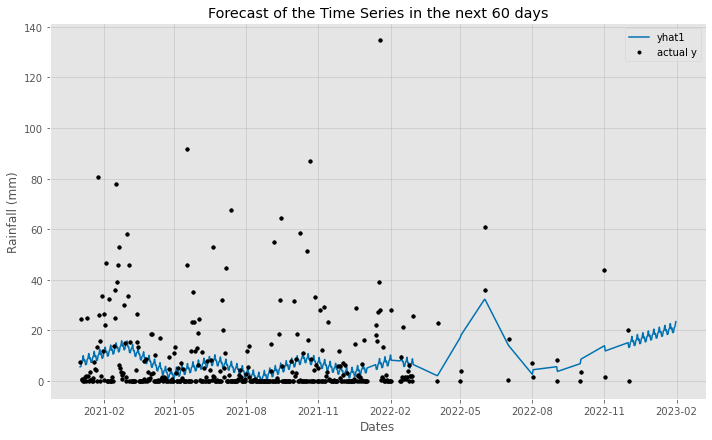

In [51]:
nm.plot(pd.concat([df_tp, n_forecast], ignore_index=True));
plt.title("Forecast of the Time Series in the next 60 days")
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

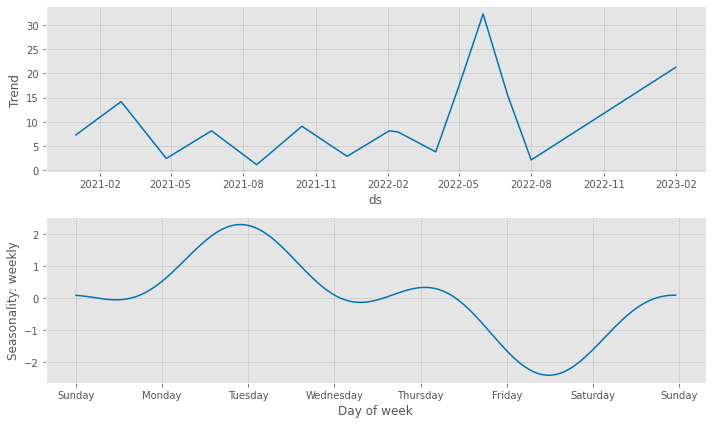

In [52]:
nm.plot_components(pd.concat([df_tp, n_forecast], ignore_index=True));

### Performance Metrics

In [53]:
n_forecast

,ds,y,yhat1,residual1,trend,season_weekly
0,2021-01-01,7.7,5.635226,-2.064774,7.293401,-1.658176
1,2021-01-02,24.4,5.796345,-18.603655,7.413465,-1.617119
2,2021-01-03,0.3,7.612227,7.312227,7.533529,0.078698
3,2021-01-04,0.7,8.173919,7.473919,7.653592,0.520327
4,2021-01-05,0.0,10.040837,10.040837,7.773656,2.267182
...,...,...,...,...,...,...
479,2023-01-27,NaN,19.147282,NaN,20.805456,-1.658176
480,2023-01-28,NaN,19.292692,NaN,20.909813,-1.617119
481,2023-01-29,NaN,21.092865,NaN,21.014168,0.078698
482,2023-01-30,NaN,21.638859,NaN,21.118532,0.520327


In [54]:
n_forecast_merge = pd.merge(df_tp, n_forecast[['ds','yhat1','residual1']],on='ds')
n_forecast_merge = n_forecast_merge[['ds','yhat1','residual1','y']]
n_forecast_merge.head()

,ds,yhat1,residual1,y
0,2021-01-01,5.635226,-2.064774,7.70
1,2021-02-01,11.535705,11.035705,0.50
2,2021-03-01,14.335898,12.685898,1.65
3,2021-04-01,7.780525,4.980525,2.80
4,2021-05-01,1.352724,-9.597276,10.95


In [55]:
n_prophet_mse = mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1'])
n_prophet_rmse = np.sqrt(mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1']))

In [56]:
print("Neural Prophet MSE: {:.4f}".format(n_prophet_mse))
print("Neural Prophet RMSE: {:.4f}".format(n_prophet_rmse))

Neural Prophet MSE: 228.2751
Neural Prophet RMSE: 15.1088


In [57]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 242.9972
Prophet RMSE: 15.5884


In [58]:
n_prophet_mse - prophet_mse

-14.722161218709658

In [59]:
n_prophet_rmse - prophet_rmse

-0.47959387483461136

Text(0, 0.5, 'Rainfall (mm)')

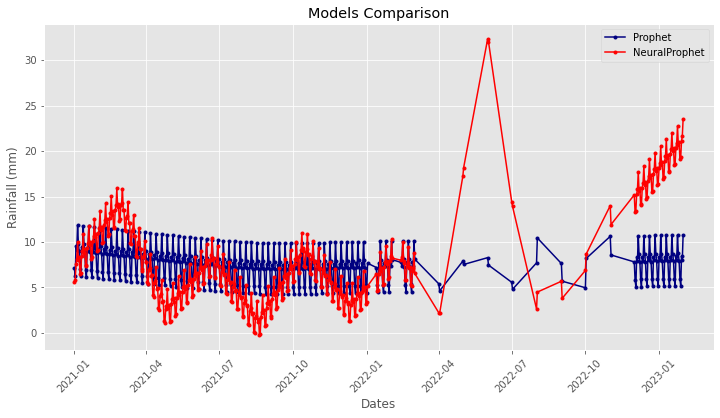

In [60]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Models Comparison")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy', label='Prophet')
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red', label='NeuralProphet')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

In [61]:
pd.DataFrame({'metrics':['MSE','RMSE'],
              'Prophet ':[prophet_mse, prophet_rmse],
              'Neural Prophet':[n_prophet_mse, n_prophet_rmse]
             })

,metrics,Prophet,Neural Prophet
0,MSE,242.997213,228.275052
1,RMSE,15.588368,15.108774


## Final Comments

*   At least for this particular dataset and using the default arguments,  the **NeuralProphet** model scored a **MSE** of **228.275052** and **RMSE** of **15.108774** whereas the **Prophet** model scored a **MSE** of **242.997213** and **RMSE** of **15.588368**, a **14.722161218709658 and 0.47959387483461136 difference of MSE and RMSE respectively** compared against the first model.